## Time series: A simple moving average (MA) model
In this short notebook we shall calculate the [simple rolling average](https://en.wikipedia.org/wiki/Moving_average), which is the mean of the last $n$ values. This smooths out the data and lets us look at overall trends. We shall then make a [moving-average model](https://en.wikipedia.org/wiki/Moving-average_model) for the same data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

!pip -q install yfinance
import yfinance as yf

For our data we shall use the '**Close**' value from the IBEX35 stock market.

(Note that stock data is pretty much a random walk, and is extremely difficult to predict. For example see the notebook ["*LSTM time series + stock price prediction = FAIL*"](https://www.kaggle.com/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail)).

In [2]:
IBEX = yf.Ticker("^IBEX")
# get historical market data
IBEX_values = IBEX.history(start="2020-06-01")

let us take a look

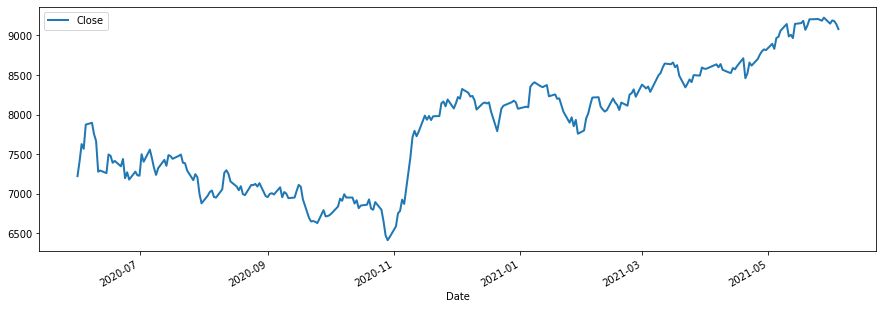

In [3]:
IBEX_values[['Close']].plot(lw=2);

### Rolling average
We shall now create a rolling average, with a window size of 10, using [`pandas.DataFrame.rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

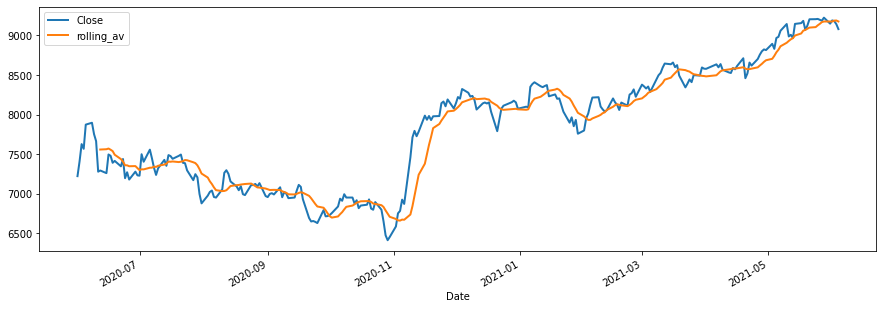

In [4]:
IBEX_values['rolling_av'] = IBEX_values['Close'].rolling(10).mean()
# take a look
IBEX_values[['Close','rolling_av']].plot(lw=2);

### Moving average model
To create our moving average model we shall use [`ARIMA`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html) from [statsmodels](https://www.statsmodels.org/). This is a composite of an autoregressive model, **AR**($p$), an integration model, **I**($d$), and a moving average model, **MA**($q$), which is passed via the tuple `order(p,d,q)`. Here we shall use again a window of $q=10$:

In [5]:
from statsmodels.tsa.arima.model import ARIMA
ARMA_model = ARIMA(endog=IBEX_values['Close'], order=(0, 0, 10))
results = ARMA_model.fit()
print(results.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  261
Model:                ARIMA(0, 0, 10)   Log Likelihood               -1632.794
Date:                Fri, 04 Jun 2021   AIC                           3289.588
Time:                        12:43:07   BIC                           3332.362
Sample:                             0   HQIC                          3306.782
                                - 261                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7827.5534    100.722     77.714      0.000    7630.141    8024.965
ma.L1          1.3011      0.080     16.246      0.000       1.144       1.458
ma.L2          1.6064      0.104     15.388      0.0

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


## Predictions
We shall now look at the predictions made by our moving average model

In [6]:
start_date = '2020-06-12'
end_date   = '2021-06-04'
IBEX_values['forecast'] = results.predict(start=start_date, end=end_date)

take a look at the numbers

In [7]:
IBEX_values[['Close','rolling_av','forecast']].tail(10)

,Close,rolling_av,forecast
Date,,,
2021-05-24,9205.500000,9105.070020,9150.620076
2021-05-25,9208.700195,9127.220020,9152.100788
2021-05-26,9196.900391,9146.140039,9087.274598
2021-05-27,9186.099609,9168.129980,9024.195382
2021-05-28,9224.599609,9176.029980,9072.734847
2021-05-31,9148.900391,9175.360059,9176.196039
2021-06-01,9189.700195,9175.940039,8982.380978
2021-06-02,9180.700195,9186.940039,9136.180936
2021-06-03,9142.400391,9188.750098,9061.257698


and now plot

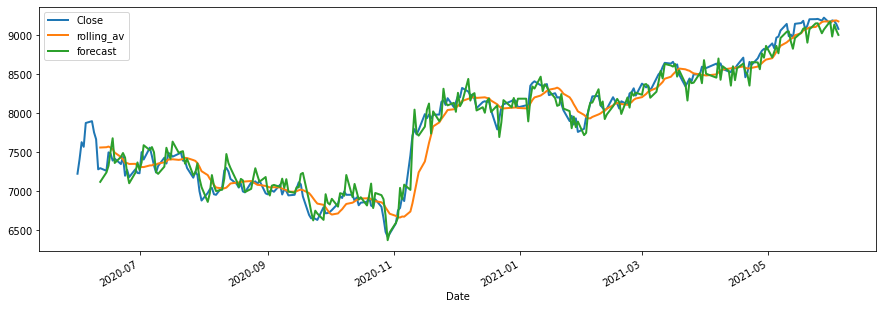

In [8]:
IBEX_values[['Close','rolling_av','forecast']].plot(lw=2);